In [2]:
from matplotlib import pyplot as plt
import numpy as np

# Noah MP Snow Parameterizations and Equations
Noah MP uses two different approaches for calculating subgrid fluxes that are relevant for snow. 
1. The Turbulent fluxes use a ''
2. The radiative fluxes use a ''

## Snow Covered Fraction


In [65]:
# Constants 
rho_new_snow = 100 # constant kg/m3 
z0 = .01 # m 
rho_snow = np.linspace(100, 350, 100)  # kg/m3
h_snow = np.linspace(.1, 3.0, 100) # m

In [66]:
# Functions
def melt_factor(rho_snow, m, rho_new_snow=100.):
    # f_melt in the documentation
    return (rho_snow/rho_new_snow)**m

def fractional_snow(h_snow, f_melt, z0=.01):
    # f_snow in the documentation
    # h_snow :: snow height
    # f_melt :: melt factor (defined above)
    # z0 :: ground roughness length. Fixed as .01m for snow (from docs...)
    inside = (h_snow/(2.5*z0*f_melt))
    return np.tanh(inside)

In [67]:
# Fractional Snow Covered area as a function of snow bulk density 

In [82]:
# Calculate fractional snow covered area as a function of snow depth and melt factor
def fsno_rho_m(m):
    fsno_list = []
    for r in list(rho_snow):
        fm = melt_factor(r, m)
        fsno_list.append(fractional_snow(.2, fm))
    return fsno_list

def fsno_snowh(m, rho_snow=200.0):
    fsno_list = []
    fm = melt_factor(rho_snow, m)
    for h in list(h_snow):  # hsnow is a global...
        fsno_list.append(fractional_snow(h, fm))
    return fsno_list


Text(0.5, 0, 'snow height (m)')

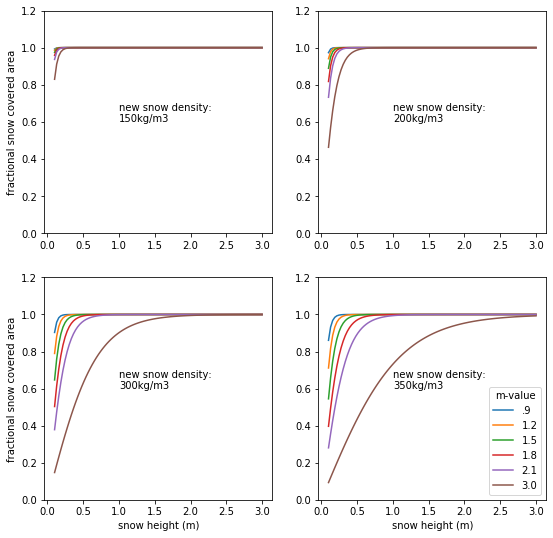

In [110]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(9,9)
xt = 1.0
yt = .6

# 0,0
ax[0,0].plot(h_snow, fsno_snowh(.9, 150), label='.9')
ax[0,0].plot(h_snow, fsno_snowh(1.2, 150), label='1.2')
ax[0,0].plot(h_snow, fsno_snowh(1.5, 150), label='1.5')
ax[0,0].plot(h_snow, fsno_snowh(1.8, 150), label='1.8')
ax[0,0].plot(h_snow, fsno_snowh(2.1, 150), label='2.1')
ax[0,0].plot(h_snow, fsno_snowh(3.0, 150), label='3.0')
ax[0,0].set_ylim(0,1.2)
ax[0,0].text(xt, yt, 'new snow density:\n150kg/m3')
ax[0,0].set_ylabel('fractional snow covered area')

# 0,1
ax[0,1].plot(h_snow, fsno_snowh(.9, 200), label='.9')
ax[0,1].plot(h_snow, fsno_snowh(1.2, 200), label='1.2')
ax[0,1].plot(h_snow, fsno_snowh(1.5, 200), label='1.5')
ax[0,1].plot(h_snow, fsno_snowh(1.8, 200), label='1.8')
ax[0,1].plot(h_snow, fsno_snowh(2.1, 200), label='2.1')
ax[0,1].plot(h_snow, fsno_snowh(3.0, 200), label='3.0')
ax[0,1].set_ylim(0,1.2)
ax[0,1].text(xt, yt, 'new snow density:\n200kg/m3')

# 1,0
ax[1,0].plot(h_snow, fsno_snowh(.9, 300), label='.9')
ax[1,0].plot(h_snow, fsno_snowh(1.2, 300), label='1.2')
ax[1,0].plot(h_snow, fsno_snowh(1.5, 300), label='1.5')
ax[1,0].plot(h_snow, fsno_snowh(1.8, 300), label='1.8')
ax[1,0].plot(h_snow, fsno_snowh(2.1, 300), label='2.1')
ax[1,0].plot(h_snow, fsno_snowh(3.0, 300), label='3.0')
ax[1,0].set_ylim(0,1.2)
ax[1,0].text(xt, yt, 'new snow density:\n300kg/m3')
ax[1,0].set_xlabel('snow height (m)')
ax[1,0].set_ylabel('fractional snow covered area')

# 1,1
ax[1,1].plot(h_snow, fsno_snowh(.9, 350), label='.9')
ax[1,1].plot(h_snow, fsno_snowh(1.2, 350), label='1.2')
ax[1,1].plot(h_snow, fsno_snowh(1.5, 350), label='1.5')
ax[1,1].plot(h_snow, fsno_snowh(1.8, 350), label='1.8')
ax[1,1].plot(h_snow, fsno_snowh(2.1, 350), label='2.1')
ax[1,1].plot(h_snow, fsno_snowh(3.0, 350), label='3.0')
ax[1,1].text(xt, yt, 'new snow density:\n350kg/m3')
ax[1,1].set_ylim(0,1.2)
ax[1,1].legend(title='m-value')
ax[1,1].set_xlabel('snow height (m)')


## Snow Surface Resistance
Rsurf for a dry, non snow covered surface (hsnow = 0, sm <.01) is a constant 1E6 s/m

In [117]:
def rsurf(fsnow, alpha, soil_wetness):
    # fsnow :: fractional snow area
    # alpha :: "surface dryness factor controlling effect of soil moistre on rsurf"
    # soil_wetness :: top soil layer, between 0 and 1--- same as volumetric soil contet???
    return fsnow*(1.0 + (1-fsnow)*np.exp(8.206 - alpha*soil_wetness))

## Relative Humidity of the snow surface/soil layer
This basically says that the snow layer is always at 100% Rh (??)
Then whatever non-snow covered portion there follows the exponetial relationship,
shown below...


In [118]:
def RH(fsnow, soil_matric_pot, Tg):
    # fsnow :: fractional snow area
    # soil_matric_pot :: soil matric potential (mm)
    # rw:: gas constant for water vapor
    # Tg:: ground temperature 
    return fsnow + (1-fsnow)*np.exp(soil_matric_pot/(rw*Tg))

## Snow Age
This gets used to compute snow albedo... IDK even know what to think of this...
Three equations get used, which are meant to account for 'the effects of grain growth due to vapor diffusion, <> freezing, and effects of soot'

Yang et al. (1997) J.of Climates describes this snow age formulation.

The function is copied from the original fortran code, found here:
https://github.com/bsu-wrudisill/wrf_hydro_nwm_public/blob/master/trunk/NDHMS/Land_models/NoahMP/phys/module_sf_noahmplsm.F. The Techdoc (Nui 2011) itself does not provide a complete description 


In [212]:
# This is mostly copied from the OG fortran code, found here: 
# 
def SnowAge(DT,
            TG, 
            SNEQV, 
            SNEQV0, 
            TAUSS):
    # Inputs
    # TG :: Ground Temperature. 
    # DT :: timestep (s)
    # SNEQV :: snow mass  (mm)
    # SNEQV0 :: snow mass at last timestep (mm)

    # Inputs/Outputs:
    # TAUSS :: <....>

    # Parameters -- from MPtable 
    TAU0 = 1E6             # initial tau value
    EXTRA_GROWTH = 10.0    # 
    GRAIN_GROWTH  = 5000.   # 
    DIRT_SOOT = 3.0        # who knows..
    SWEMX =  1.00          # snow (mm) to cover old snow 
    TFRZ = 273.15
    
    # Equation... 
    DELA0 = DT/TAU0
    ARG   = GRAIN_GROWTH*(1./TFRZ-1./TG)
    AGE1  = np.exp(ARG)
    AGE2  = np.exp(min(0.,EXTRA_GROWTH*ARG))
    AGE3  = DIRT_SOOT
    TAGE  = AGE1+AGE2+AGE3
    DELA  = DELA0*TAGE
    DELS  = max(0.0,SNEQV-SNEQV0) / SWEMX
    SGE   = (TAUSS+DELA)*(1.0-DELS)
    TAUSS = max(0.,SGE)
    
    FAGE= TAUSS/(TAUSS+1.)
    return FAGE, TAUSS
    
    

#### Compute the Snow Age for 1 month. Let the snow decrease from 20mm swe to 5 mm,  and the Air temperature increases from 260 -> 270 

In [207]:
DT = 3600.  # 1 hour...
days = 30
nsteps = 30*24
TG = np.linspace(260., 275, nsteps) #
SNEQV = np.linspace(20, 5, nsteps)  # dec
TAU = 0 # statting TAU value..

snow_age_list = []
for i in range(nsteps-2):
    FAGE, TAU = SnowAge(DT, TG[i+1],SNEQV[i+1],SNEQV[i], TAU)
    snow_age_list.append(FAGE)

Text(0, 0.5, 'Snow Mass (mm)')

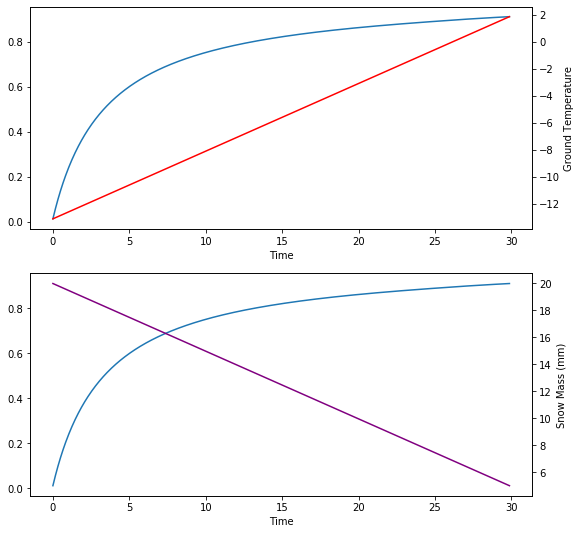

In [211]:
fig,ax = plt.subplots(2,1)
fig.set_size_inches(9, 9)
days = np.arange(nsteps-2)/24.
ax[0].plot(days, snow_age_list)
ax[1].plot(days, snow_age_list)

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')


ax00 = ax[0].twinx()
ax01 = ax[1].twinx()

#ax2 = ax.twinx()

# plot temperature
ax00.plot(days, TG[2:]-273.15, label='temperature', color='red')
ax00.set_ylabel('Ground Temperature')

# plot temperature
ax01.plot(days, SNEQV[2:], label='Snow Water Equivalent', color='Purple')
ax01.set_ylabel('Snow Mass (mm)')




### Snow Albedo Options
NoahMP provides 2 possible snow albedo options

#### BATS scheme
Bats uses the snow age (calculated above), wheras the CLASS scheme does not.
<???Also... class takes an iloc/jloc input wheras BATS does not ...???>

In [ ]:
def BATS(***args):
        SL=parameters%BATS_COSZ
        SL1=1./SL
        SL2=2.*SL
        CF1=((1.+SL1)/(1.+SL2*COSZ)-SL1)
        FZEN=AMAX1(CF1,0.)

        ALBSNI(1)=parameters%BATS_VIS_NEW*(1.-parameters%BATS_VIS_AGE*FAGE)         
        ALBSNI(2)=parameters%BATS_NIR_NEW*(1.-parameters%BATS_NIR_AGE*FAGE)        

        ALBSND(1)=ALBSNI(1)+parameters%BATS_VIS_DIR*FZEN*(1.-ALBSNI(1))    !  vis direct
        ALBSND(2)=ALBSNI(2)+parameters%BATS_VIS_DIR*FZEN*(1.-ALBSNI(2))    !  nir direct

        